In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.  Importing Iibraries**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2.  Load Dataset**

In [191]:
df=pd.read_csv('csvs')
df.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


# **3.  Pre Processing**

In [192]:
df.shape

(1842, 22)

In [193]:
df['dementia_all'].value_counts()

dementia_all
0    1726
1     116
Name: count, dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [195]:
df['dementia_all'].unique()

array([0, 1])

In [196]:
df.isnull().sum()

ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

# Drop Null values

In [197]:
df=df.dropna()

In [198]:
df.isnull().sum()

ID                      0
age                     0
gender                  0
dementia                0
dementia_all            0
educationyears          0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
study                   0
study1                  0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [199]:
df.shape

(923, 22)

In [200]:
# Drop the columns
df = df.drop(columns=['ID','dementia','lac_count', 'CMB_count', 'study1'])

In [201]:
df.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas
0,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,scans,3.0,7.0,3
1,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,scans,2.0,3.0,1
2,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,scans,1.0,2.0,1
4,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,scans,2.0,3.0,2
5,62.75,male,0,24.0,-0.380000,-1.110000,-0.526667,0,ex-smoker,Yes,Yes,zero,2 to 3,scans,0.0,2.0,2


In [202]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Apply LabelEncoder to the 'smoking' column
df['smoking'] = label_encoder.fit_transform(df['smoking'])

# Apply LabelEncoder to the 'hypertension' column
df['hypertension'] = label_encoder.fit_transform(df['hypertension'])

# Apply LabelEncoder to the 'hypertension' column
df['hypercholesterolemia'] = label_encoder.fit_transform(df['hypercholesterolemia'])

# Apply LabelEncoder to the 'hypertension' column
df['lacunes_num'] = label_encoder.fit_transform(df['lacunes_num'])

# Apply LabelEncoder to the 'fazekas_cat' column
df['fazekas_cat'] = label_encoder.fit_transform(df['fazekas_cat'])

# Apply LabelEncoder to the 'study' column
df['study'] = label_encoder.fit_transform(df['study'])

In [203]:
df.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,0,1,1,0,1,3,3.0,7.0,3
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,0,0,3,2.0,3.0,1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,2,1,1,0,0,3,1.0,2.0,1
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,0,1,3,2.0,3.0,2
5,62.75,1,0,24.0,-0.380000,-1.110000,-0.526667,0,1,1,1,1,1,3,0.0,2.0,2


In [204]:
df['smoking'].unique()

array([0, 1, 2])

In [205]:
## Convert all dataframe to integer
df=df.astype(int)

In [206]:
df.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas
0,52,1,0,11,-2,-1,-1,0,0,1,1,0,1,3,3,7,3
1,64,1,0,10,1,0,0,0,1,1,1,0,0,3,2,3,1
2,74,1,0,8,-1,-1,0,0,2,1,1,0,0,3,1,2,1
4,79,1,0,10,0,-1,0,0,1,1,1,0,1,3,2,3,2
5,62,1,0,24,0,-1,0,0,1,1,1,1,1,3,0,2,2


# **4. EDA (Exploratory Data Analysis)**

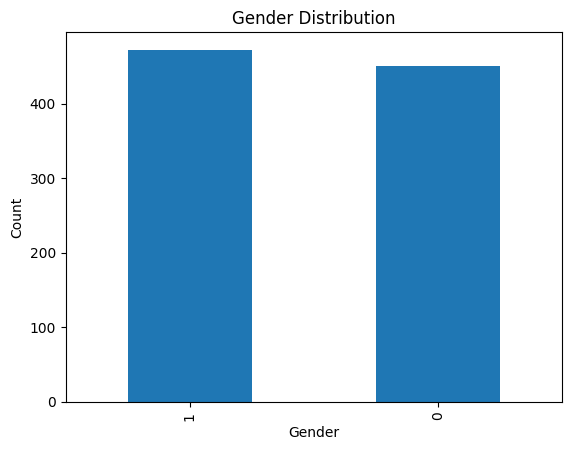

In [207]:
## Gender Distribution

df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [208]:
df['dementia_all'].value_counts()

dementia_all
0    879
1     44
Name: count, dtype: int64

<ipython-input-209-a04271dc79ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['gender'] == 1], x='dementia_all', palette='viridis', ax=axes[0])
<ipython-input-209-a04271dc79ea>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['gender'] == 0], x='dementia_all', palette='viridis', ax=axes[1])


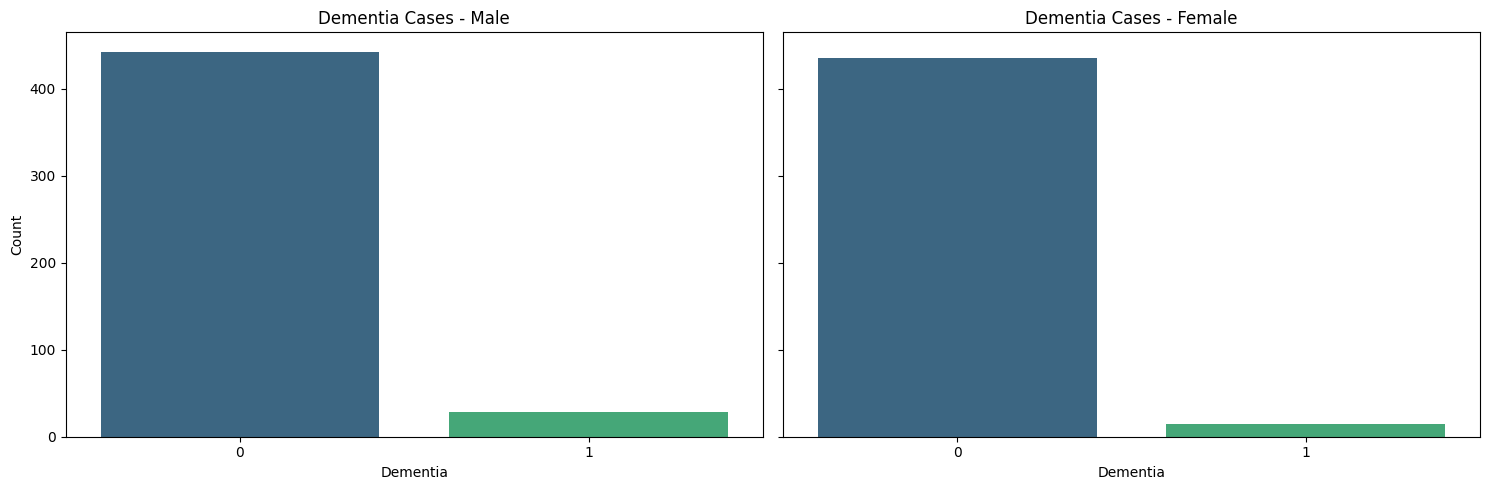

In [209]:

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot for Male
sns.countplot(data=df[df['gender'] == 1], x='dementia_all', palette='viridis', ax=axes[0])
axes[0].set_title('Dementia Cases - Male')
axes[0].set_xlabel('Dementia')
axes[0].set_ylabel('Count')

# Plot for Female
sns.countplot(data=df[df['gender'] == 0], x='dementia_all', palette='viridis', ax=axes[1])
axes[1].set_title('Dementia Cases - Female')
axes[1].set_xlabel('Dementia')

# Show the plots
plt.tight_layout()
plt.show()

<ipython-input-210-4f72b5a7a912>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')


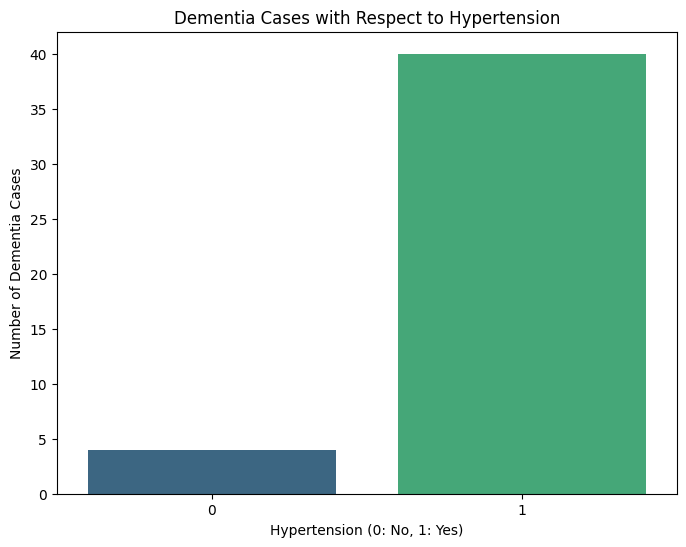

In [210]:
# Group by 'hypertension' and calculate the number of dementia cases
grouped = df.groupby('hypertension')['dementia_all'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
plt.title('Dementia Cases with Respect to Hypertension')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Number of Dementia Cases')
plt.show()

<ipython-input-211-d549ece59670>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')


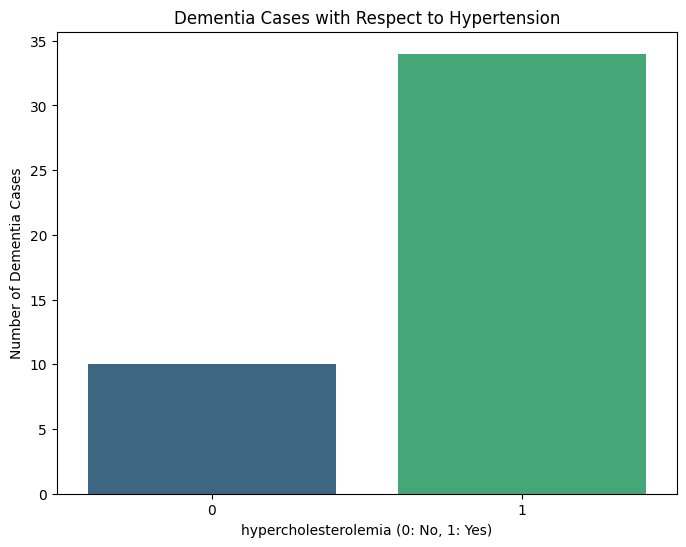

In [211]:
# Group by 'hypertension' and calculate the number of dementia cases
grouped = df.groupby('hypercholesterolemia')['dementia_all'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
plt.title('Dementia Cases with Respect to Hypertension')
plt.xlabel('hypercholesterolemia (0: No, 1: Yes)')
plt.ylabel('Number of Dementia Cases')
plt.show()

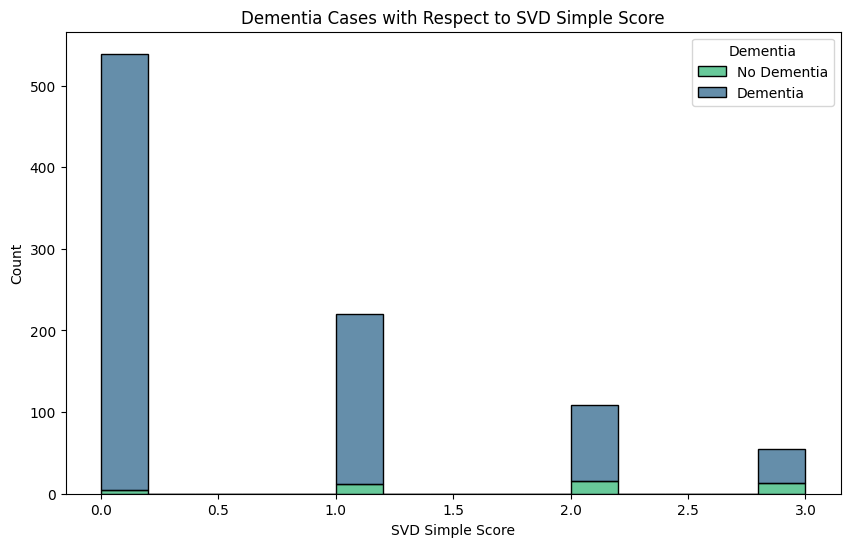

In [212]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SVD Simple Score', hue='dementia_all', multiple='stack', palette='viridis')
plt.title('Dementia Cases with Respect to SVD Simple Score')
plt.xlabel('SVD Simple Score')
plt.ylabel('Count')
plt.legend(title='Dementia', labels=['No Dementia', 'Dementia'])
plt.show()

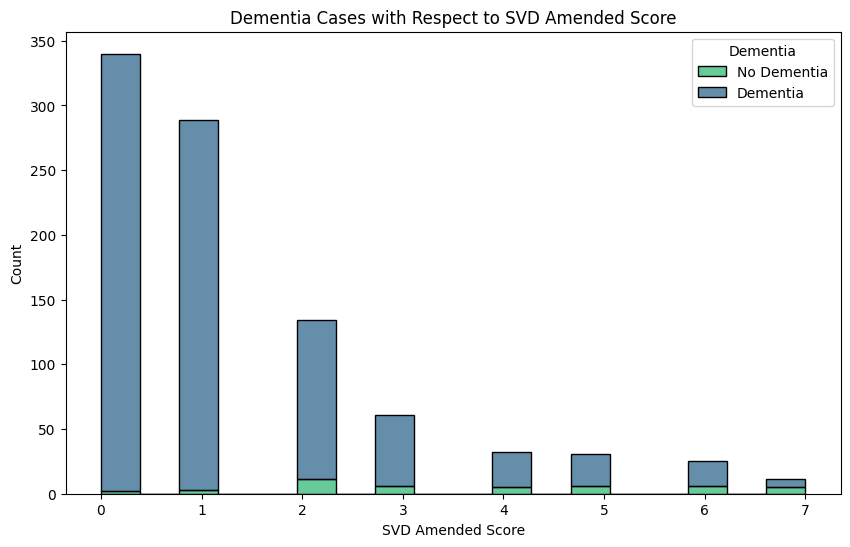

In [213]:
# Plotting for Dementia with respect to SVD Amended
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SVD Amended Score', hue='dementia_all', multiple='stack', palette='viridis')
plt.title('Dementia Cases with Respect to SVD Amended Score')
plt.xlabel('SVD Amended Score')
plt.ylabel('Count')
plt.legend(title='Dementia', labels=['No Dementia', 'Dementia'])
plt.show()

# **5.  Feature Engineering**

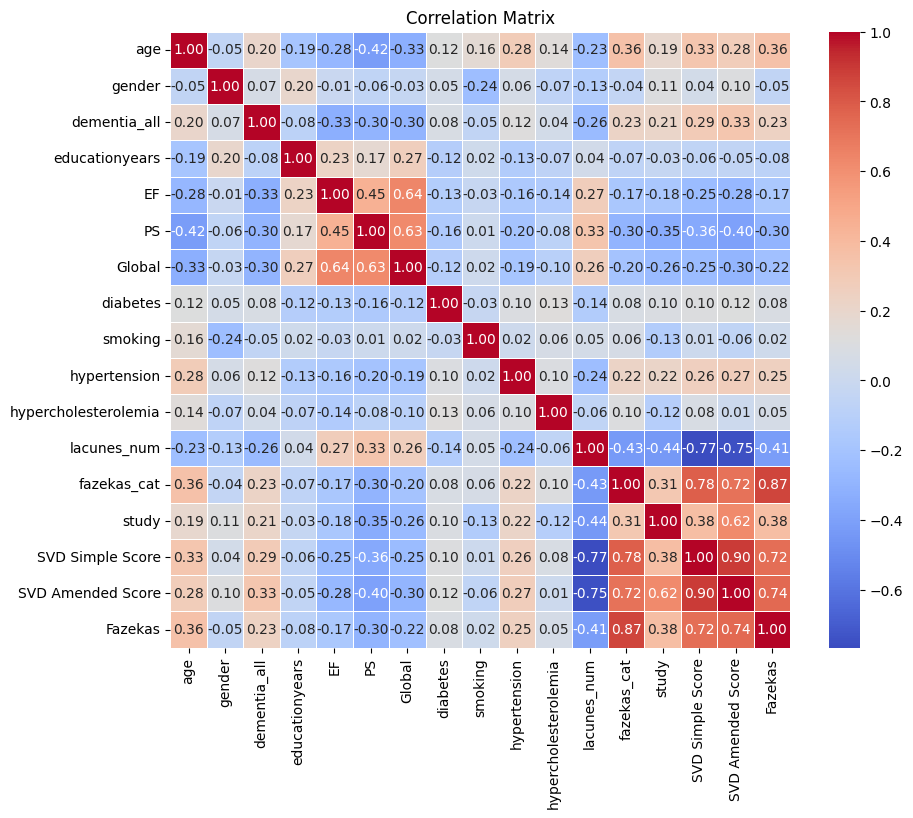

In [214]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [215]:
## Remove the attributes with 'neagtive' relation with dementia_all
df=df.drop(columns=['educationyears','EF','Global', 'PS','smoking','lacunes_num','Global'], axis=1)

In [216]:
X=df.drop(columns=["dementia_all"])
y=df['dementia_all']

In [217]:
## Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
y_train.value_counts ()

dementia_all
0    709
1     29
Name: count, dtype: int64

In [219]:
## During Preprocessing we found imbalance data. Thats why we use technique to balance the data.

from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [220]:
X_train_resampled.shape

(1418, 10)

In [221]:
y_train_resampled.value_counts()

dementia_all
0    709
1    709
Name: count, dtype: int64

# **6  Model Building**

**6.1 Logistic Regression**

In [260]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)
# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)



LogisticRegression(max_iter=1000)

In [261]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {lr_accuracy:.2f}')


Accuracy: 0.82


In [225]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test, y_pred): .2f}")
print(f'Recall: {recall_score(y_test, y_pred): .2f}')
print(f'f1 Score: {f1_score(y_test, y_pred): .2f}')

Precision:  0.21
Recall:  0.47
f1 Score:  0.29


**6.2 Decision Tree**

In [226]:
# Initialize the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

In [227]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy:.2f}')

Accuracy: 0.89


In [228]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test, y_pred): .2f}")
print(f'Recall: {recall_score(y_test, y_pred): .2f}')
print(f'f1 Score: {f1_score(y_test, y_pred): .2f}')

Precision:  0.29
Recall:  0.27
f1 Score:  0.28


**6.3 Random Forest**

In [229]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(random_state=42)

In [230]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [231]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_accuracy:.2f}')

Accuracy: 0.90


In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test, y_pred): .2f}")
print(f'Recall: {recall_score(y_test, y_pred): .2f}')
print(f'f1 Score: {f1_score(y_test, y_pred): .2f}')

Precision:  0.33
Recall:  0.27
f1 Score:  0.30


**6.4 Feed Forward Neural Network**

In [248]:
from keras.models import Sequential
from keras.layers import Dense
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [249]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])

In [250]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 1s 15ms/step - loss: 0.2661 - accuracy: 0.9593 - val_loss: 0.2469 - val_accuracy: 0.9595
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9610 - val_loss: 0.1677 - val_accuracy: 0.9595
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.9610 - val_loss: 0.1682 - val_accuracy: 0.9595
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1523 - accuracy: 0.9593 - val_loss: 0.2353 - val_accuracy: 0.9595
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 0.9593 - val_loss: 0.1685 - val_accuracy: 0.9595
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1652 - accuracy: 0.9559 - val_loss: 0.1561 - val_accuracy: 0.9595
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 0.9576 - val_loss: 0.1738 - val_accuracy: 0.9392
Epoch 8/10
19/19 [=

In [251]:
# Evaluate the model
loss, fnn_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {fnn_accuracy}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.9189
Test accuracy: 0.9189189076423645


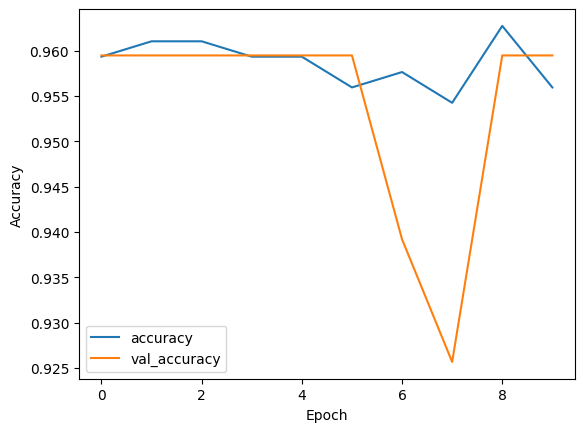

In [252]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**6.5 Naye Byes**

In [254]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [255]:
# Predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [256]:
# Evaluate model performance
nb_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {nb_accuracy * 100:.2f}%')

Accuracy: 82.70%


In [257]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test, y_pred): .2f}")
print(f'Recall: {recall_score(y_test, y_pred): .2f}')
print(f'f1 Score: {f1_score(y_test, y_pred): .2f}')

Precision:  0.16
Recall:  0.27
f1 Score:  0.20


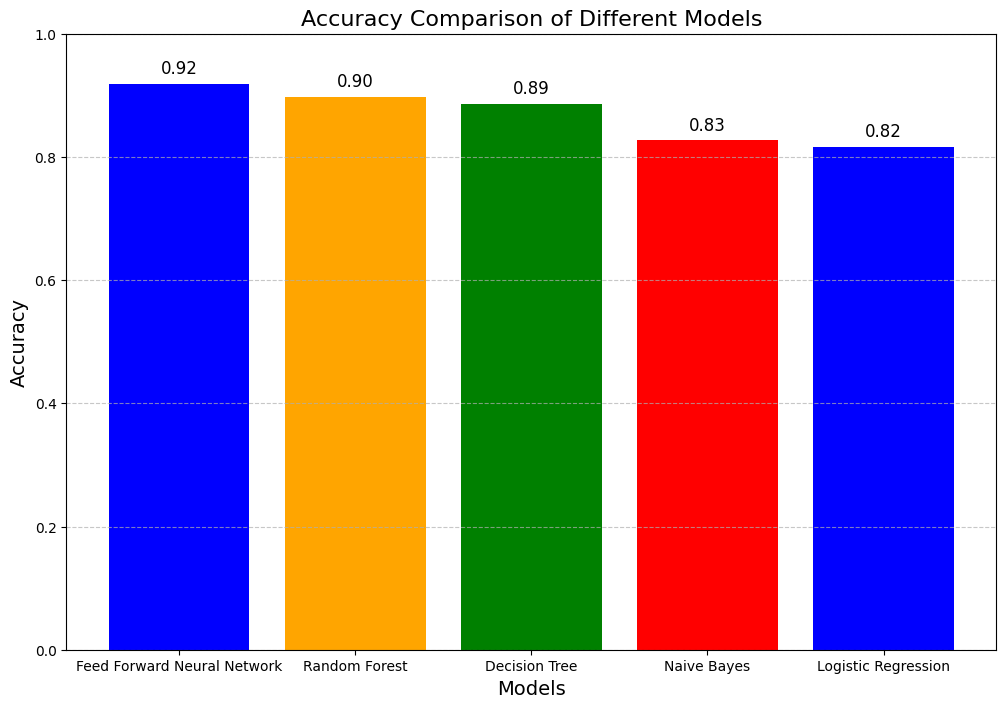

In [263]:
import matplotlib.pyplot as plt

# Assuming you have stored the accuracy values in the following variables
accuracies = [ fnn_accuracy, rf_accuracy, dt_accuracy, nb_accuracy, lr_accuracy  ]
models = ['Feed Forward Neural Network', 'Random Forest', 'Decision Tree','Naive Bayes', 'Logistic Regression' ]

# Create the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Add titles and labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Different Models', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()
